In [6]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  Resize dimensions
IMG_SIZE = 64

#  Set dataset directory
DATASET_DIR = os.path.join("glass_no_glass", "train")

#  Class labels
CATEGORIES = {
    "with_glasses": 1,
    "without_glasses": 0
}

#  Function to load and preprocess images
def load_images_from_folder(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
            flattened = resized.flatten()
            data.append([flattened, label])
    return data

#  Load and label all data
all_data = []
for category in CATEGORIES:
    folder_path = os.path.join(DATASET_DIR, category)
    label = CATEGORIES[category]
    all_data.extend(load_images_from_folder(folder_path, label))

#  Convert to DataFrame
features = [item[0] for item in all_data]
labels = [item[1] for item in all_data]

df = pd.DataFrame(features)
df['label'] = labels

print(" Data loaded successfully. Shape:", df.shape)
display(df.head())


 Data loaded successfully. Shape: (74879, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,206,206,207,205,206,206,207,206,208,207,...,194,192,193,194,193,191,190,189,190,1
1,205,205,206,206,205,206,206,206,206,206,...,194,194,194,193,194,194,192,192,192,1
2,191,189,185,191,186,132,144,152,153,168,...,230,219,220,227,228,171,146,140,139,1
3,108,106,103,100,96,93,81,81,89,101,...,64,66,86,91,89,94,92,99,98,1
4,169,168,170,169,172,170,171,171,172,171,...,151,152,154,153,147,148,147,146,145,1


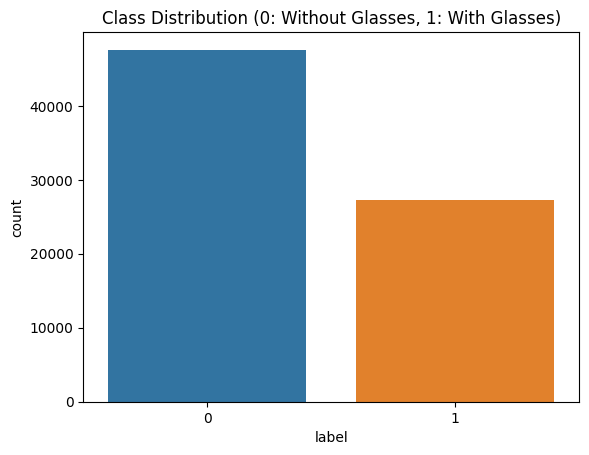

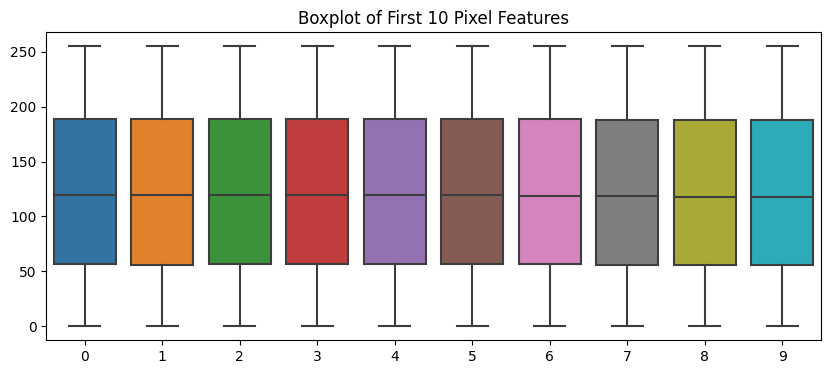

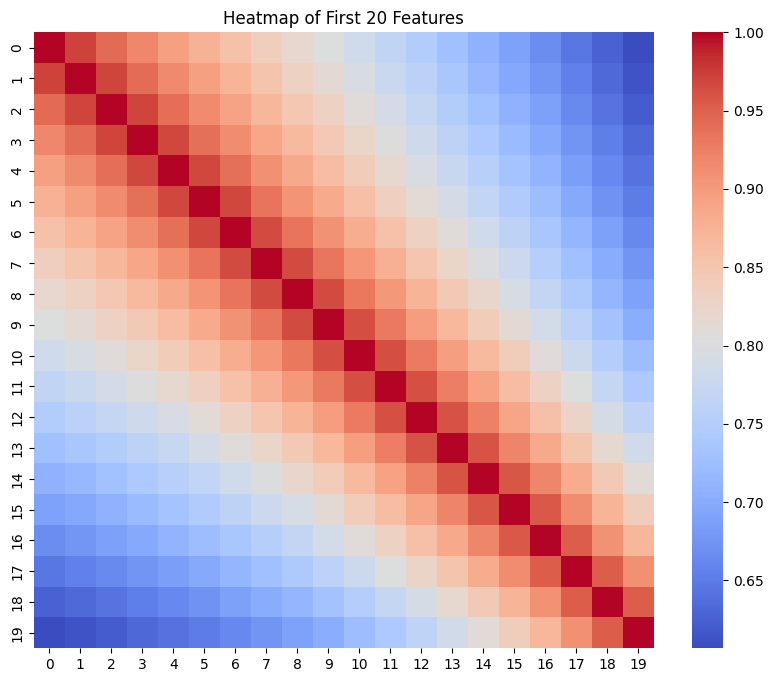

In [7]:
#  Check class distribution
sns.countplot(data=df, x='label')
plt.title('Class Distribution (0: Without Glasses, 1: With Glasses)')
plt.show()

#  Box plot of some sample features
plt.figure(figsize=(10, 4))
sns.boxplot(data=df.iloc[:, :10])  # just first 10 features for visualization
plt.title("Boxplot of First 10 Pixel Features")
plt.show()

#  Correlation heatmap (first 20 features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :20].corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap of First 20 Features")
plt.show()


In [8]:
#  Split data
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

#  Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


In [9]:
# Evaluate Decision Tree
print(" Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

#  Evaluate K-Nearest Neighbors
print("\n K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))


 Decision Tree Results
Accuracy: 0.8852163461538461
Confusion Matrix:
 [[8718  861]
 [ 858 4539]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      9579
           1       0.84      0.84      0.84      5397

    accuracy                           0.89     14976
   macro avg       0.88      0.88      0.88     14976
weighted avg       0.89      0.89      0.89     14976


 K-Nearest Neighbors Results
Accuracy: 0.7325721153846154
Confusion Matrix:
 [[8005 1574]
 [2431 2966]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      9579
           1       0.65      0.55      0.60      5397

    accuracy                           0.73     14976
   macro avg       0.71      0.69      0.70     14976
weighted avg       0.73      0.73      0.73     14976



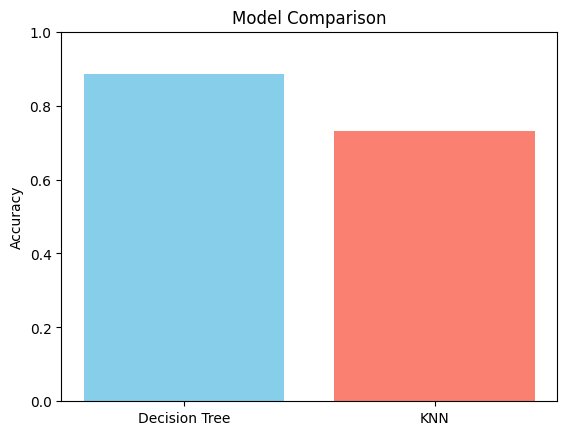

In [10]:
#  Compare Predictions Bar Chart
labels = ['Decision Tree', 'KNN']
scores = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, knn_preds)]

plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


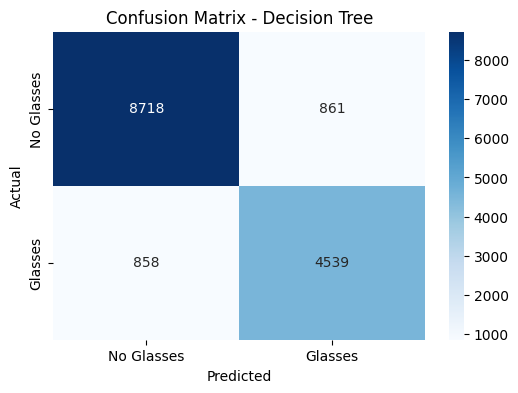

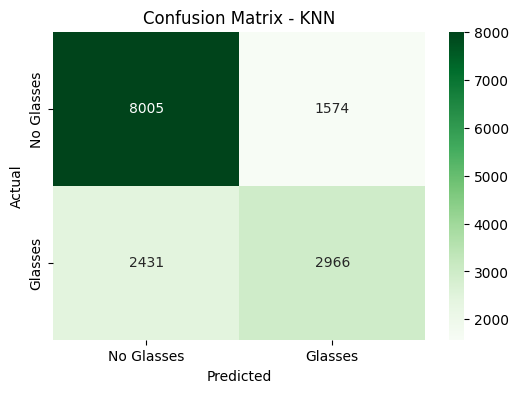

In [11]:
#Confusion Matrix Heatmaps (Decision Tree & KNN)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Greens', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


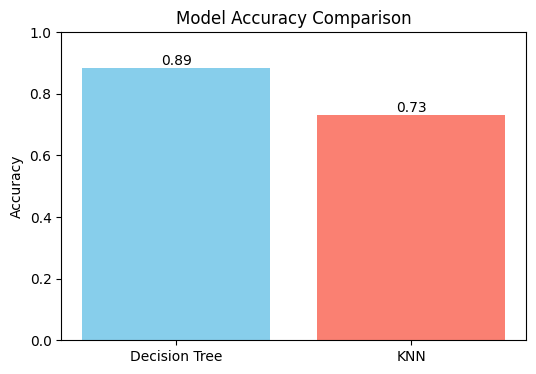

In [12]:
#Accuracy Bar Chart (Model Comparison)
#  Compare Accuracy Scores
labels = ['Decision Tree', 'KNN']
scores = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, knn_preds)]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


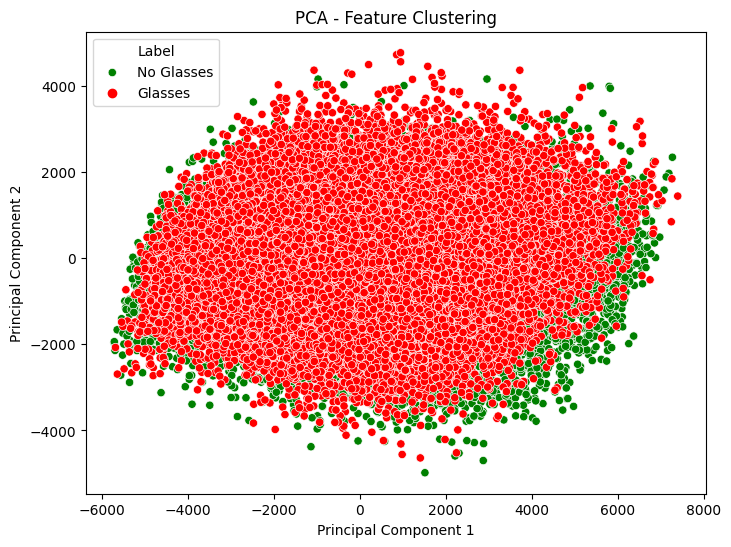

In [13]:
#PCA 2D Scatter Plot (Feature Clustering)
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette=['red', 'green'])
plt.title("PCA - Feature Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Label', labels=['No Glasses', 'Glasses'])
plt.show()
